In [198]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [130]:
# Load dataset 
iris = load_iris()
X = iris.data
y = iris.target 
N = X.shape[0]
# Targets:
# 0: Setosa 
# 1: Versicolour
# 2: Virginica

# Features:
# 0: Sepal Length
# 1: Sepal Width
# 2: Petal Length
# 3: Petal Width

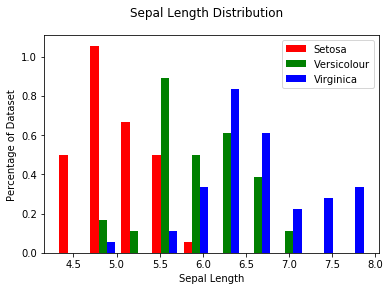

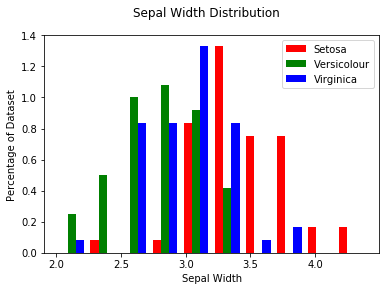

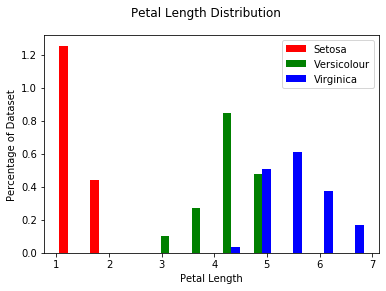

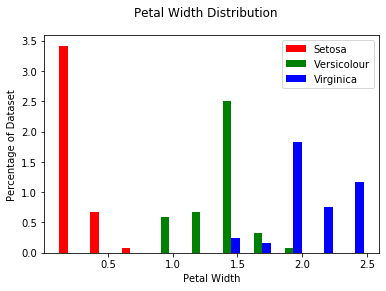

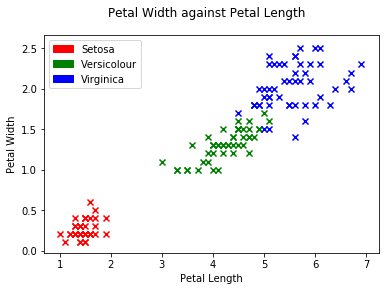

In [131]:
# Basic data exploration
# Plot distribution of y with each feature
Setosa = X[:50]
Versicolour = X[50:100]
Virginica = X[100:150]

colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolour', 'Virginica']
# Sepal Length 
plt.figure()
sepalLens = np.stack(\
    (Setosa[:,0], Versicolour[:,0], Virginica[:,0]),axis=1)
numBins = 10
plt.hist(\
    sepalLens, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Sepal Length Distribution")
plt.xlabel("Sepal Length")
plt.ylabel("Percentage of Dataset")

# Sepal Width 
plt.figure()
sepalWidths = np.stack(\
    (Setosa[:,1], Versicolour[:,1], Virginica[:,1]),axis=1)
numBins = 10
plt.hist(\
    sepalWidths, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Sepal Width Distribution")
plt.xlabel("Sepal Width")
plt.ylabel("Percentage of Dataset")

# Petal Length 
plt.figure()
petalLens = np.stack(\
    (Setosa[:,2], Versicolour[:,2], Virginica[:,2]),axis=1)
numBins = 10
plt.hist(\
    petalLens, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Petal Length Distribution")
plt.xlabel("Petal Length")
plt.ylabel("Percentage of Dataset")

# Petal Width 
plt.figure()
petalWidths = np.stack(\
    (Setosa[:,3], Versicolour[:,3], Virginica[:,3]),axis=1)
numBins = 10
plt.hist(\
    petalWidths, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Petal Width Distribution")
plt.xlabel("Petal Width")
plt.ylabel("Percentage of Dataset")

# Scatter plot petal length and width 
plt.figure()
for i in range(0,N):
    plt.scatter(X[i,2], X[i,3], marker='x', color=colors[y[i]])
plt.suptitle("Petal Width against Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
legendElements = [\
    Patch(facecolor=colors[0], edgecolor=colors[0],\
         label=labels[0]),\
    Patch(facecolor=colors[1], edgecolor=colors[1],\
         label=labels[1]),
    Patch(facecolor=colors[2], edgecolor=colors[2],\
         label=labels[2]),
]
plt.legend(handles=legendElements)

In [173]:
# Scale inputs 
scaledX = scale(X)

In [209]:
def generateGraph(variable, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    xLabel, yLabel, title, log=False):
    plt.figure()
    if log is False:
        plt.plot(variable, trainScoresMean, "-o", color="blue",\
            label="Training Accuracy")
        plt.plot(variable, testScoresMean, "-o", color="red",\
            label="Cross-Validation Accuracy")
    else: 
        plt.semilogx(variable, trainScoresMean, "-o",\
            color="blue", label="Training Accuracy")
        plt.semilogx(variable, testScoresMean, "-o",\
            color="red", label="Cross-Validation Accuracy")
    plt.fill_between(variable, trainScoresMean-trainScoresStd,\
        trainScoresMean+trainScoresStd, alpha=0.1, color="blue")
    plt.fill_between(variable, testScoresMean-testScoresStd,\
        testScoresMean+testScoresStd, alpha=0.1, color="red")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.legend(loc="lower right")

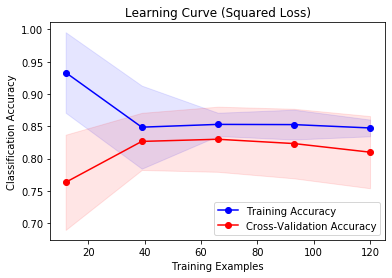

In [248]:
# A Basic Linear Classifier 
estimator = SGDClassifier(loss="squared_loss", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.20)
# Learning curve 
trainSizes, trainScores, testScores = learning_curve(\
    estimator, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Squared Loss)")

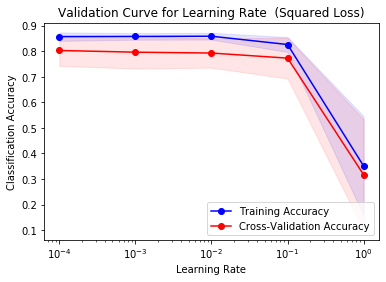

In [215]:
# Comment: Method of selecting a learning rate for the basic
# linear model. Use a validation curve, varying the learning
# rate.

# Determine ideal learning rate
learningRates = np.logspace(-4,0,5)
trainScores, testScores = validation_curve(estimator, scaledX, y,\
    "eta0", learningRates, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(learningRates, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Learning Rate", "Classification Accuracy",\
    "Validation Curve for Learning Rate  (Squared Loss)", True)

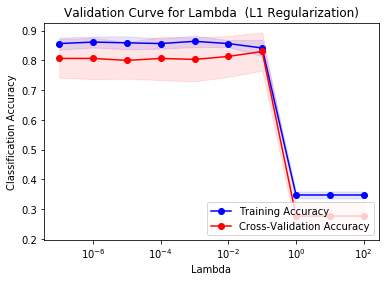

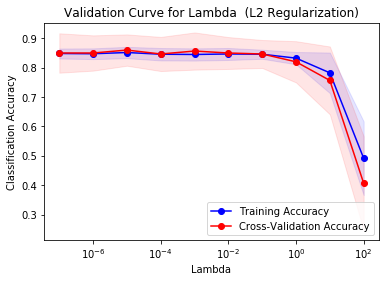

In [247]:
# L1 and L2 regularization
# Determine optimal lambda value
# Set of lamba values to test 
alphas = np.logspace(-7,2,10)

# L1 regularization
l1Estimator = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l1Estimator, scaledX, y,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (L1 Regularization)", True)

# L1 regularization
l2Estimator = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l2Estimator, scaledX, y,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (L2 Regularization)", True)

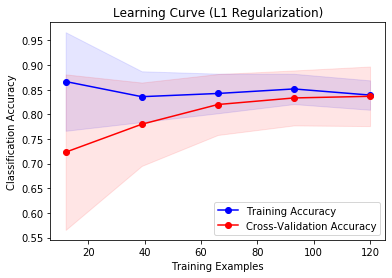

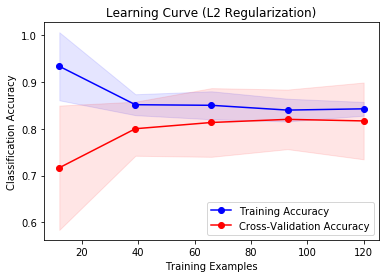

In [253]:
# Plot learning curves with L1 and L2 regularization 
# L1 
l1EstimatorOptimal = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, alpha=0.1)
trainSizes, trainScores, testScores = learning_curve(\
    l1EstimatorOptimal, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (L1 Regularization)")

# L2 
l2EstimatorOptimal = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, alpha=0.1)
trainSizes, trainScores, testScores = learning_curve(\
    l2EstimatorOptimal, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (L2 Regularization)")

In [254]:
# Plotting the weights of the regularized models 
# lambas to test: alphas


array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02])